In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras import models, layers, regularizers, metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
from imblearn.over_sampling import SMOTE
from split_data import Split_data


ModuleNotFoundError: No module named 'split_data'

In [14]:
# loading
y = np.genfromtxt('../../data/processed_files/test/label.csv',delimiter=',')

In [15]:
X = np.genfromtxt('../../data/processed_files/test/features.csv',delimiter=',')

In [16]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [17]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [18]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [19]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [20]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [21]:
metrics.AUC


tensorflow.python.keras.metrics.AUC

In [22]:
X[0].shape

(18,)

In [12]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 18)                0         
_________________________________________________________________
dense (Dense)                (None, 18)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=1000, validation_data=data_validate.batch(32))

Epoch 1/1000
574/574 [==============================] - 1s 1ms/step - loss: 0.5655 - accuracy: 0.7419 - val_loss: 0.5028 - val_accuracy: 0.7753
Epoch 2/1000
574/574 [==============================] - 1s 986us/step - loss: 0.3613 - accuracy: 0.8568 - val_loss: 0.3717 - val_accuracy: 0.8293
Epoch 3/1000
574/574 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.8977 - val_loss: 0.2733 - val_accuracy: 0.8830
Epoch 4/1000
574/574 [==============================] - 1s 1ms/step - loss: 0.2183 - accuracy: 0.9216 - val_loss: 0.2414 - val_accuracy: 0.9033
Epoch 5/1000
574/574 [==============================] - 1s 993us/step - loss: 0.1996 - accuracy: 0.9286 - val_loss: 0.2311 - val_accuracy: 0.9090
Epoch 6/1000
574/574 [==============================] - 1s 1000us/step - loss: 0.1909 - accuracy: 0.9338 - val_loss: 0.1878 - val_accuracy: 0.9313
Epoch 7/1000
574/574 [==============================] - 1s 1ms/step - loss: 0.1844 - accuracy: 0.9349 - val_loss: 0.2434 - val_ac

KeyboardInterrupt: 

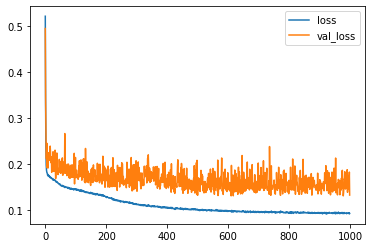

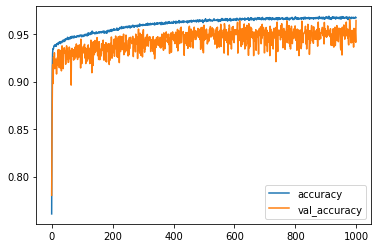

In [45]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [46]:
np.hstack([model.predict(X_val), Y_val[:,np.newaxis]])

array([[1.5074404e-05, 0.0000000e+00],
       [9.9429500e-01, 1.0000000e+00],
       [8.5546613e-12, 0.0000000e+00],
       ...,
       [6.6839308e-02, 0.0000000e+00],
       [5.0009447e-01, 1.0000000e+00],
       [7.8617847e-01, 1.0000000e+00]], dtype=float32)

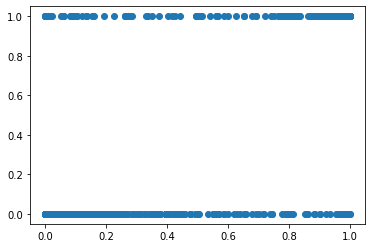

In [47]:
plt.scatter(model.predict(X_val), Y_val)

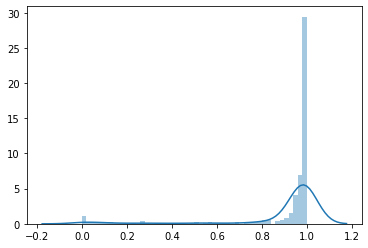

In [48]:
sns.distplot(model.predict(X_val)[Y_val==1])

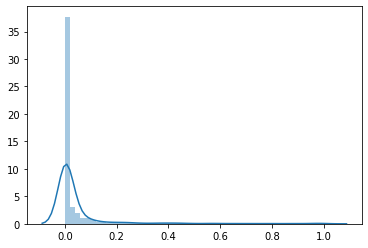

In [49]:
sns.distplot(model.predict(X_val)[Y_val==0])

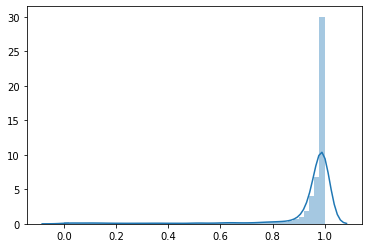

In [50]:
sns.distplot(model.predict(x_train_res)[y_train_res==1])

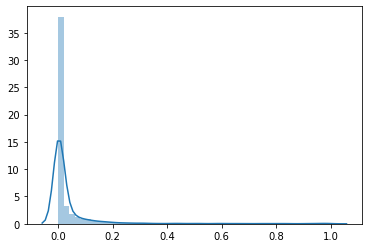

In [51]:
sns.distplot(model.predict(x_train_res)[y_train_res==0])

In [52]:
#roc auc
met.roc_auc_score(Y_val,model.predict(X_val))

0.9832492683787082